# 수치 미분  
    
## 미분  
한순간의 변화량을 표시한 것.  
그래프의 한순간의 기울기인거 같음  
  
<img src="./img/math.png">      <br>
이 사진을 보면 중1 때 배웠던 기울기 수식이랑 비슷한거 같음  
x증가량 분의 y증가량 즉, x증가량/y증가량 이 기울기 구하는 식이였는데 미분도 비슷하다  

### 미분의 잘못된 예
1e-50 는 아주 작은 숫자라서 컴퓨터에서 0.0 이라고 인식한다.  
**반올림 오차** 문제를 일으킨다.  
  
여기서 작은 숫자를 대입하는 이유는 더 정확한 기울기를 구하려고 하기 때문인듯  
이 구현으로는 진정한 미분 (진정한 접선) 을 구하기는 힘들다고 한다.  
  
1e-4 가 가장 적당한 값이라고 한다.  

In [25]:
def numerical_diff(f, x):
    h = 1e-50 # 잘못된 수
    return (f(x+h) - f(x)) / h

In [26]:
def numerical_diff(f, x):
    h = 1e-4 # 옳은 수
    return (f(x+h) - f(x)) / h

## 전방 차분과 중심 차분, 중앙 차분
방금 구현한 미분 함수는 f(x) 와 f(x+h) 의 기울기를 구한 것이다.  
이를 **전방 차분** 이라고 한다.  
  
중심 차분, 중앙 차분은 f(x-h) 와 f(x+h) 의 기울기를 구하는 것이므로 정확히 중심이 x 인 접선을 구하는 것이다.  
이 때, (x-h) 와 (x+h) 의 차는 2h 이므로 함수를 구할 때 h로 나누는 것이 아닌 2h 로 나누어야 한다.  

In [27]:
def numerical_diff(f, x):
    h = 1e-4
    return (f(x+h) - f(x-h)) / (2 * h)

## 수치 미분 예
y = 0.01x^2 + 0.1x 를 미분해보자

In [28]:
def function_1(x):
    return 0.01*(x**2) + 0.1*x

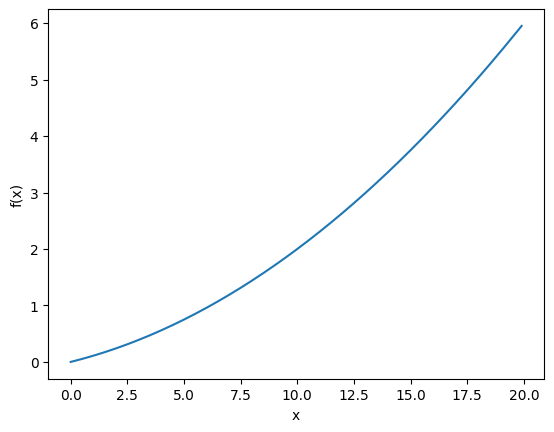

In [29]:
import numpy as np
import matplotlib.pylab as plt

x = np.arange(0.0, 20.0, 0.1)
y = function_1(x)
plt.xlabel('x')
plt.ylabel('f(x)')
plt.plot(x, y)
plt.show()

In [30]:
print(numerical_diff(function_1, 5))
print(numerical_diff(function_1, 10))

0.1999999999990898
0.2999999999986347


함수 f(x) 의 해석적 미분은 0.02x + 0.1 이다.  
그러므로 f(5), f(10)을 미분하면 0.2와 0.3이다.  
내가 만든 함수로 미분을 하면 0.1999999999990898와 0.2999999999986347로 아주 근사한 값이 나오게 된다. 

# 편미분
f(x_0, x_1) = x_0^2 + x_1^2  
이 함수를 살펴보면 변수가 2개이다.  
이를 보면 편미분이 대충 어떤 미분인지 유추 할 수 있을 것이다.   

In [31]:
def function_2(x):
    return x[0]**2 + x[1]**2

이 식을 미분하기 위해서는 x_0, x_1 중에 미분할 대상을 정해야 한다.  
이처럼 변수가 여럿인 함수에 대한 미분을 **편미분**이라고 한다.  

x_0 = 3, x_1 = 4 일 때, x_0 에 대한 편미분을 구하여라.

In [32]:
def function_tmp1(x0):
    return x0*x0 + 4.0**2.0

numerical_diff(function_tmp1, 3.0)

6.00000000000378

x_0 = 3, x_1 4 일 때, x_1 에 대한 편미분을 구하여라.

In [33]:
def function_tmp2(x1):
    return 3.0**2.0 + x1*x1

numerical_diff(function_tmp2, 4.0)

7.999999999999119

### 기울기
x_0 와 x_1 의 편미분을 변수별로 따로 계산했습니다.  
그럼 x_0 과 x_1 의 편미분을 동싱에 계산하고 싶으면 어떻게 해야할까?  
  
x_0 = 3, x_1 = 4 일 때,  
(x_0, x_1)를 편미분하여 벡터로 정리한 것을 **기울기** 라고 한다.  
  
**기울기**: 모든 변수의 편미분을 벡터로 정리한 것  

In [34]:
def numerical_diff(f, x):
    h = 1e-4
    grad = np.zeros_like(x)

    for i in range(x.size):
        tmp = x[i]
        x[i] = tmp + h
        fxh1 = f(x)
        
        x[i] = tmp - h
        fxh2 = f(x)

        grad[i] = (fxh1 - fxh2) / (2*h)
        x[i] = tmp
    
    return grad

In [35]:
numerical_diff(function_2, np.array([3.0, 4.0]))

array([6., 8.])

기울기는 가장 낮은 장소 (최솟값) 을 가리키는 것 같지만, 사실은 각 지점에서 낮아지는 방향을 가리킨다.  
즉, **기울기가 가리키는 쪽은 각 장소에서 함수의 출력 값을 가장 크게 줄이는 방향** 이다.

(이 내용이 경사하강법의 원리에 적용될듯. 오차함수의 크기를 가장 크게 줄이는 방향으로 쓰일 수 있으니)

# 경사하강법  
기울기를 이용해 함수의 최솟값(또는 가능한 한 작은 값)을 찾는 것  

함수가 극솟값, 최솟값, 또 **안장점(Saddle Point)** 극솟값은 국소적인 최솟값, 즉 한정된 범위에서의 최솟값인 점이다. 
    
극솟값: 국소적인 최솟값, 즉 한정된 범위에서의 최솟값인 점  
안장점: 어느 방향에서 보면 극댓값이고 다른 방향에서 보면 극솟값이 되는 점  
![](https://upload.wikimedia.org/wikipedia/commons/thumb/4/40/Saddle_point.png/640px-Saddle_point.png)

### 경사법 수식
![](https://velog.velcdn.com/images%2Fjakeseo_me%2Fpost%2F1d5481d5-c66d-4c92-86d7-b4c8c83c8c60%2Fgradient_descent_method_equation.png)  
  
n(에타) 기호는 Learning Rate (학습률) 이다.  
기울기에 학습률을 곱해 x에 경사하강법을 시행한다.  
학습률이 너무 크거나 작으면 경사하강법이 제대로 일어나지 않을 수 있다.  

In [36]:
def gradient_descent(f, init_x, lr=0.01, step_num=100):
    x = init_x

    for i in range(step_num):
        grad = numerical_diff(f, x)
        x -= lr * grad
    return x

In [37]:
init_x = np.array([-3.0, 4.0])
print(f'learning rate: {10}\t', gradient_descent(function_2, init_x=init_x, lr=10, step_num=100))
for i in range(11):
    init_x = np.array([-3.0, 4.0])
    lr = round(0.1 ** i, i+1)
    result = gradient_descent(function_2, init_x=init_x, lr=lr, step_num=100)
    print(f'learning rate: {lr}\t', result)

learning rate: 10	 [-2.58983747e+13 -1.29524862e+12]
learning rate: 1.0	 [-3.  4.]
learning rate: 0.1	 [-6.11110793e-10  8.14814391e-10]
learning rate: 0.01	 [-0.39785867  0.53047822]
learning rate: 0.001	 [-2.45570041  3.27426722]
learning rate: 0.0001	 [-2.94059014  3.92078685]
learning rate: 1e-05	 [-2.99400594  3.99200791]
learning rate: 1e-06	 [-2.99940006  3.99920008]
learning rate: 1e-07	 [-2.99994  3.99992]
learning rate: 1e-08	 [-2.999994  3.999992]
learning rate: 1e-09	 [-2.9999994  3.9999992]
learning rate: 1e-10	 [-2.99999994  3.99999992]


In [38]:
import numpy as np

def crossEntropyError(y, t):
    if y.ndim == 1:
        t = t.reshape(1, t.size)
        y = y.reshape(1, y.size)
        
    # 훈련 데이터가 원-핫 벡터라면 정답 레이블의 인덱스로 반환
    if t.size == y.size:
        t = t.argmax(axis=1)
             
    batch_size = y.shape[0]
    return -np.sum(np.log(y[np.arange(batch_size), t] + 1e-7)) / batch_size

def softmax(x):
    if x.ndim == 2:
        x = x.T
        x = x - np.max(x, axis=0)
        y = np.exp(x) / np.sum(np.exp(x), axis=0)
        return y.T 

    x = x - np.max(x) # 오버플로 대책
    return np.exp(x) / np.sum(np.exp(x))


class SimpleNet():
    def __init__(self):
        self.weight = np.random.randn(2, 3)
        
    def predict(self, x):
        return np.dot(x, self.weight)

    def loss(self, x, t):
        result = self.predict(x)
        activateResult = softmax(result)
        return crossEntropyError(activateResult, t)
        

In [39]:
simpleNet = SimpleNet()
x = np.array([1, 2])
simpleNet.predict(x)
t = np.array([0, 0, 1])
print(simpleNet.loss(x, t))

0.9800100892517114


In [41]:
def numericalGradient(f, w):
    h = 1e-4
    grad = np.zeros_like(w)

    for i in range(w.size):
        tmp = w[i]
        w[i] = tmp + h
        fxh1 = f(w)

        w[i] = tmp - h
        fxh2 = f(w)

        grad[i] = (fxh1 - fxh2)/(2*h)
        w[i] = tmp
    return grad


In [42]:
def f(W):
    return simpleNet.loss(x, t)

dW = numericalGradient(f, simpleNet.weight)

IndexError: index 2 is out of bounds for axis 0 with size 2